# *Bootcamp* IGTI - Analista de *Machine Learning*: Desafio Módulo 1 -- Fundamentos

Aplicação dos conceitos de análise e modelamento de Machine Learning aprendidos no Módulo 1 do Bootcamp.

**Objetivos:**
* *Exploratory Data Analysis* (EDA) - Análise exploratória dos dados
* Preparação dos dados
* Análise de modelos - Regressão Linear / Árvore de Decisão 

## **Introdução ao Desafio**

Neste desafio iremos utilizar uma versáo modificada do *dataset* *"Bike Sharing"* disponível no [***UCI Machine Learning Repository***](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset). Serão abordados todos os conceitos apresentados durante a disciplina **Fundamentos de *Machine Learning* (FAM)**.

No arquivo iremos trabalhar com um conjunto de informações sobre o compartilhamento de bicicletas, com dados sobre as condições climáticas, localização das bicicletas, entre outros.



#### Dicionário de Variáveis

>```instant``` - index do registro
>
> ```dteday```  - data
>
> ```season```  - estação do ano (1: winter, 2: spring, 3: summer, 4: fall)
>
> ```yr```      - ano (0: 2011, 1: 2012)
>
> ```mnth```    - mês (1 a 12)
>
> ```hr```      - hora (0 a 23)
>
> ```holiday``` - se o dia é um feriado ou não
>
> ```weekday``` - dia de semana
>
> ```workingday``` - se o dia é um fim de semana e não feriado = 1, se não for = 0
>
> ```temp```    - temperatura normalizada em Celsius
>
>```atemp```   - sensação térmica normalizada em Celsius.
>
> ```hum```     - Umidade normalizada. Os valores são divididos em 100 (máx)
>
> ```windspeed``` - velocidade do vento normalizada. Os valores são divididos em 67 (máx)
>
> ```casual```  - contagem de usuários casuais
>
> ```registered``` - contagem de usuários registrados
>
> ```cnt```     - contagem total de alugéis de bicicletas entre casuais e resgistrados

## **Mãos-à-Obra**

In [1]:
# importar as bibliotecas e métodos utilizados
from sklearn import datasets #sklearn é uma das lib mais utilizadas em ML, ela contém, além dos 
                            #datasets, várias outras funções úteis para a análise de dados
                            # essa lib será sua amiga durante toda sua carreira
import pandas as pd  # importa a lib Pandas. Essa lib é utilizada para lidar com dataframes (TABELAS) 
                     #de forma mais amigável. 
from sklearn.model_selection import train_test_split,KFold,cross_val_score, cross_val_predict # esse método é utilizado para dividir o 
                                                    # conjunto de dados em grupos de treinamento e test
from sklearn.svm import SVC      #importa o algoritmo svm para ser utilizado 
from sklearn import tree         # importa o algoritmo arvore de decisão
from sklearn.linear_model import LogisticRegression #importa o algoritmo de regressão logística
from sklearn.metrics import mean_absolute_error #utilizada para o calculo do MAE
from sklearn.metrics import mean_squared_error #utilizada para o calculo do MSE
from sklearn.metrics import r2_score #utilizada para o calculo do R2
from sklearn import metrics  #utilizada para as métricas de comparação entre os métodos
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
upload = files.upload()

Saving comp_bikes_mod.csv to comp_bikes_mod.csv


In [4]:
# importar o dataset
df = pd.read_csv('comp_bikes_mod.csv')

# visualizar as primeiras 5 entradas do dataset
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,NaN,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


In [5]:
# visualizar as informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15641 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      15641 non-null  float64
 3   yr          15641 non-null  float64
 4   mnth        15641 non-null  float64
 5   hr          15641 non-null  float64
 6   holiday     15641 non-null  float64
 7   weekday     15641 non-null  float64
 8   workingday  15641 non-null  float64
 9   weathersit  15641 non-null  float64
 10  temp        15641 non-null  float64
 11  atemp       15641 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   15641 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  15641 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


#### **Quantas instâncias e atributos existem, respectivamente?**

In [6]:
df.shape

(17379, 17)

#### **Quantos tipos de dados existem no dataset?**

In [7]:
print("Tipos de dados existentes: {}".format(df.dtypes.nunique()))

Tipos de dados existentes: 2


#### **Qual é a proporção (em %) de valores nulos na coluna "temp" (temperatura ambiente normalizada)?**

In [8]:
print("Valore nulos:\t{}".format(round(((df.temp.isnull().sum()/df.shape[0]) * 100),2)) + "%")

Valore nulos:	10.0%


#### **Eliminar as linhas que contenham valores nulos para a coluna "dteday"**

In [9]:
# eliminando as entradas
df_clean = df.dropna(subset=['dteday'], axis=0)

# comparação
print("Antes:\t{}".format(df.shape))
print("Depois:\t{}".format(df_clean.shape))

Antes:	(17379, 17)
Depois:	(15641, 17)


#### **Qual o  valor médio para os dados da coluna "temp" depois de retirar as linhas que continham valores nulos?**

In [10]:
print("média:\t{}".format(round(df_clean.temp.mean(),4)))

média:	0.4969


#### **Qual o desivio padrão para os dados da coluna "windspeed" após a retirada das linhas com valores nulos da coluna "dteday"?**

In [11]:
print("Desvio:\t{}".format(round(df_clean.windspeed.std(),4)))

Desvio:	0.1223


#### **Após a eliminação das linhas com valores nulos na coluna "dteday", transforme a coluna "season" em valores categóricos. Quantas categorias diferentes existem?**

In [12]:
df_clean.loc[:,'season'].astype("category")

1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
        ... 
17373    1.0
17374    NaN
17375    1.0
17377    1.0
17378    NaN
Name: season, Length: 15641, dtype: category
Categories (4, float64): [1.0, 2.0, 3.0, 4.0]

In [13]:
# confirmando a mudança
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15641 entries, 1 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     14060 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      14061 non-null  float64
 3   yr          14076 non-null  float64
 4   mnth        14062 non-null  float64
 5   hr          14068 non-null  float64
 6   holiday     14076 non-null  float64
 7   weekday     14078 non-null  float64
 8   workingday  14097 non-null  float64
 9   weathersit  14078 non-null  float64
 10  temp        14066 non-null  float64
 11  atemp       14076 non-null  float64
 12  hum         14070 non-null  float64
 13  windspeed   14082 non-null  float64
 14  casual      14071 non-null  float64
 15  registered  14090 non-null  float64
 16  cnt         14079 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.1+ MB


Agora podemos ver que o tipo da coluna "season" foi mudada corretamente para category

#### **Transforme a coluna "dteday" no tipo "datetime", utilizando o dataset limpo de valores nulos. Qual é a última data presente no dataset(YYYY-MM-DD)?**

In [14]:
type(df_clean.dteday)  # confirmando o tipo de dado na coluna

pandas.core.series.Series

In [15]:
# converter os tipos de dados da coluna
#df_clean['dteday']=pd.to_datetime(df_clean.loc[:,'dteday'],format="%Y-%m-%d")

df_clean['dteday'] = pd.to_datetime(df_clean['dteday'], format="%Y-%m-%d")
#pd.to_datetime(df_clean['dteday'],format="%Y-%m-%d")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [16]:
# confirmando a mudança
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15641 entries, 1 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     14060 non-null  float64       
 1   dteday      15641 non-null  datetime64[ns]
 2   season      14061 non-null  float64       
 3   yr          14076 non-null  float64       
 4   mnth        14062 non-null  float64       
 5   hr          14068 non-null  float64       
 6   holiday     14076 non-null  float64       
 7   weekday     14078 non-null  float64       
 8   workingday  14097 non-null  float64       
 9   weathersit  14078 non-null  float64       
 10  temp        14066 non-null  float64       
 11  atemp       14076 non-null  float64       
 12  hum         14070 non-null  float64       
 13  windspeed   14082 non-null  float64       
 14  casual      14071 non-null  float64       
 15  registered  14090 non-null  float64       
 16  cnt         14079 non-

In [17]:
print("Última Data:\t{}".format(df_clean['dteday'].iloc[-1]))

Última Data:	2012-12-31 00:00:00


#### **Após a retirada das linhas que continham valores nulos para a coluna "dteday". Considerando o boxplot da variável "windspeed"**

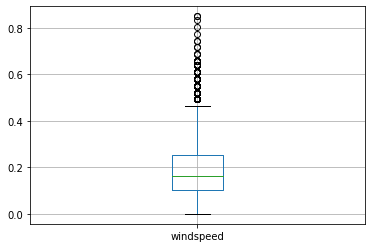

In [18]:
df_clean.boxplot(['windspeed']);

#### **Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Selecione as colunas "season", "temp", "atemp", "hum", "windspeed". Plot a matriz de correlação.**

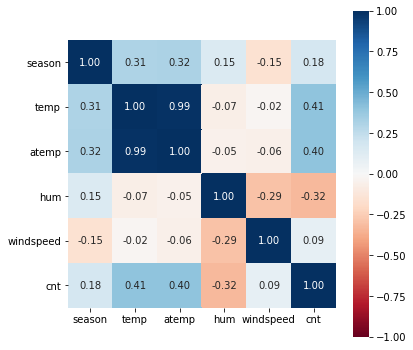

In [19]:
# criar um novo dataframe com as colunas pedidas
df_correlacao = df_clean[['season','temp','atemp','hum','windspeed','cnt']]

matriz_corr = df_correlacao.corr()  # cria a matriz de correlação

import seaborn as sn

#plotar a matriz
plt.figure(figsize=(6,6))
sn.heatmap(matriz_corr,annot=True,vmin=-1,vmax=1,center=0,cmap='RdBu',fmt='.2f',square=True,linecolor='white');

#### **Preencha os valores nulos das colunas "hum","cnt" e "casual" com os valores médios. Utilize as variáveis "hum" e "casual" como independentes e a "cnt" como dependente. Aplique uma regressão linear. Qual o valor de R2? Utilize as entradas como teste.**

In [20]:
#substituir os valores nulos pela média
df_clean.loc[:,'hum'].fillna(df_clean.loc[:,'hum'].mean(), inplace=True)
df_clean.loc[:,'cnt'].fillna(df_clean.loc[:,'cnt'].mean(), inplace=True)
df_clean.loc[:,'casual'].fillna(df_clean.loc[:,'casual'].mean(), inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [21]:
# realizando a análise da regressão
x1 = df_clean['hum'].values  #variável independente
x2 = df_clean['casual'].values  #variavel independente
y = df_clean['cnt'].values  # variável dependente

In [22]:
x1_reshaped = x1.reshape(-1,1)  # coloca os dados em 2D
x2_reshaped = x2.reshape(-1,1)  # coloca os dados em 2D

x = np.column_stack((x1_reshaped,x2_reshaped))  # agrupa as variaveis preditoras

In [23]:
# importar o modelo de regressão linear univariada
from sklearn.linear_model import LinearRegression

In [24]:
# realiza a construção do modelo de regressão
reg = LinearRegression()
regressao = reg.fit (x, y) # encontra ps coeficientes

In [25]:
# realiza a previsão
previsao = reg.predict(x)

In [26]:
# análise do modelo
from sklearn.metrics import r2_score

In [27]:
# parâmetros encontrados
print('Y = {}X {}'.format(reg.coef_, reg.intercept_))

R_2 = r2_score(y, previsao)  #calcula  R2

print("Coeficiente de Determinação (R2):", (round(R_2,3)))

Y = [-99.75012328   2.21512197]X 173.29337505135362
Coeficiente de Determinação (R2): 0.406


#### **Utilize os mesmos dados da questão anterior ("hum" e "casual" como variáveis independentes e "cnt" como variavel dependente). Aplique a árvore de decisão como regressão. Qual é o valor aproximado de R2? Utilize as entradas como teste e valores "default".**

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(x)

In [29]:
from sklearn.tree import DecisionTreeRegressor  # importar a árvore de decisão como regressor

In [30]:
entrada_arvore = scaled_df[:,1].reshape(-1,1)  # entrada para a regressão via árvore
saida_arvore = scaled_df[:,1].reshape(-1,1)  # saída para a regressão via árvore

In [31]:
x_train, x_teste, y_train, y_test = train_test_split(x, y)

In [32]:
arvore_regressora = DecisionTreeRegressor()  # define o objeto para a árvore
arvore_regressora.fit(x, y)  # aplica a regressao

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [33]:
# realiza a previsao
previsao_arvore = arvore_regressora.predict(x)

In [34]:
print("Erro Absoluto:", metrics.mean_absolute_error(y, previsao_arvore))
print("Mean Squared Error:", metrics.mean_squared_error(y, previsao_arvore))

Erro Absoluto: 58.54911405435064
Mean Squared Error: 8577.336772824097


In [35]:
R_2_a = r2_score(y, previsao_arvore)  #calcula  R2

print("Coeficiente de Determinação (R2):", (R_2_a))

Coeficiente de Determinação (R2): 0.7098339715834964


#### **Qual *insight* podemos encontrar comparando os valores de R2 encontrado com a regressão linear e com a árvore de decisão?**

In [36]:
print("Coeficiente de Determinação (R2) - Regressão:", R_2)
print("Coeficiente de Determinação (R2) - Árvore de Decisão:", R_2_a)

Coeficiente de Determinação (R2) - Regressão: 0.4059859251122173
Coeficiente de Determinação (R2) - Árvore de Decisão: 0.7098339715834964


Comparando os dois resultandos, podemos chega à conclusão que o valor encontrado pela Árvore de Decisão possui maior valor, se aproximando mais de 1.